In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
# Try to use the style 'fivethirtyeight'
try:
    plt.style.use("fivethirtyeight")
except OSError:
    # If 'fivethirtyeight' is not found, print a message and use a default style
    print("Style 'fivethirtyeight' not found. Using default style.")
    # You can choose a different default style here, e.g., 'default' or 'classic'
    # plt.style.use('default')

In [ ]:
#example text for model training (SMS messages)
simple_train = ['call you tonight', 'call me a cab', 'P1 ease call me ..Please!']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(simple_train)

vect.get_feature_names_out()

array(['cab', 'call', 'ease', 'me', 'p1', 'please', 'tonight', 'you'],
      dtype=object)

In [ ]:
# transform training data into a 'document-term matrix
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 11 stored elements and shape (3, 8)>

In [ ]:
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0]])

In [ ]:
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names_out())
# Use get_feature_names_out() instead of the deprecated get_feature_names()


,cab,call,ease,me,p1,please,tonight,you
0,0,1,0,0,0,0,1,1
1,1,1,0,1,0,0,0,0
2,0,1,1,1,1,1,0,0


In [ ]:
# check the type of the document-term matrix
print(type(simple_train_dtm))

# examine the sparse matrix contents
print(simple_train_dtm)

<class 'scipy.sparse._csr.csr_matrix'>
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 11 stored elements and shape (3, 8)>
  Coords	Values
  (0, 1)	1
  (0, 6)	1
  (0, 7)	1
  (1, 0)	1
  (1, 1)	1
  (1, 3)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1


In [ ]:
# example text for model testing
simple_test = ["please don't call me"]

In [ ]:
# transform testing data into a document-term matrix (using existing vocabulary)
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 0, 1, 0, 1, 0, 0]])

In [ ]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,ease,me,p1,please,tonight,you
0,0,1,0,1,0,1,0,0


In [ ]:
from google.colab import files
upload = files.upload()

Saving spam.csv to spam.csv


In [ ]:
import pandas as pd

sms = pd.read_csv("spam.csv", encoding='latin-1')
sms.dropna(how="any", inplace=True, axis=1)
sms.columns = ['label', 'message']

sms.head()



,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [ ]:
#convert label to a numerical variable
sms['label_num'] = sms.label.map({"ham":0, "spam":1})
sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
sms['message_len'] = sms.message.apply(len)
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'message length')

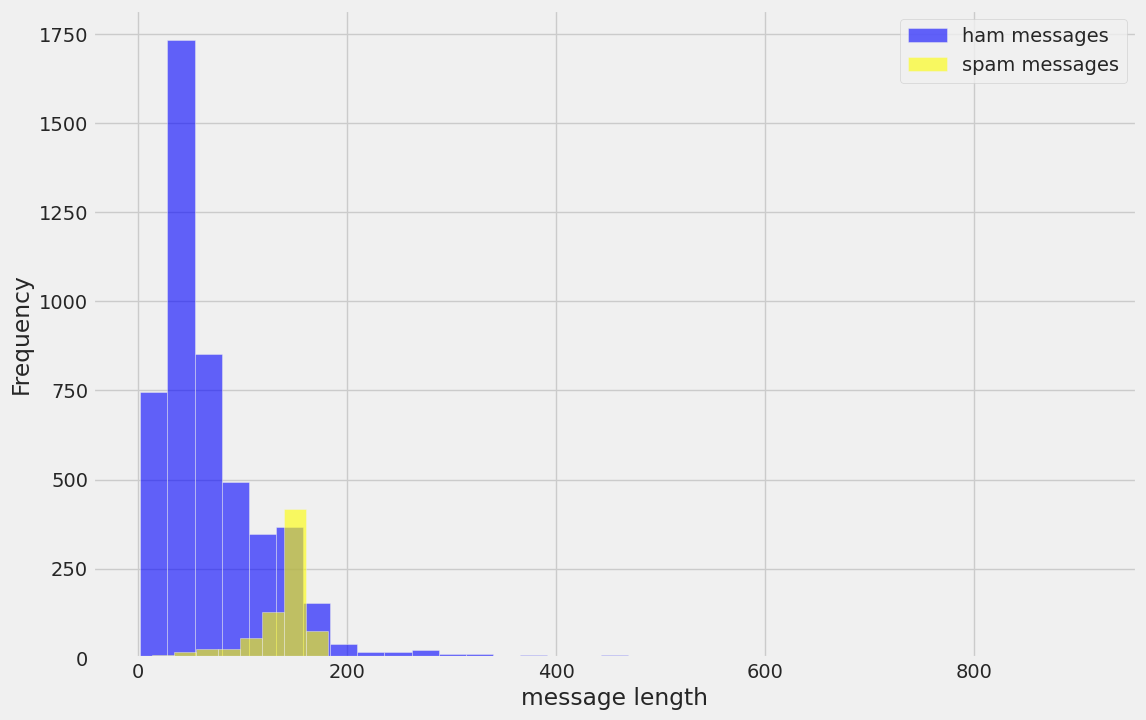

In [ ]:
plt.figure(figsize = (12,8))
sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color= 'blue',
                                       label = 'ham messages' , alpha = 0.6)
sms[sms.label=='spam'].message_len.plot(kind='hist', color = 'yellow',
                                        label = 'spam messages', alpha = 0.6)
plt.legend()
plt.xlabel("message length")

In [ ]:
sms[sms.label=='ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [ ]:
sms[sms.label=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [ ]:
sms[sms.message_len== 910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [ ]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def text_process(mess):
  """
  Takes in a string of text, then performs the following:
  1. Remove all punctuation
  2. Remove all stopwords
  3. Returns a list of the cleaned text
  """
  STOPWORDS = stopwords.words("english") + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
  # Check characters to see if they are in punctuation

  nopunc = [char for char in mess if char not in string.punctuation]

  # Join the characters again to form the string
  nopunc = ''.join(nopunc)
  # Now just remove any stopwords
  return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [ ]:
sms['clean_msg'] = sms.message.apply(text_process)

sms.head()

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [ ]:
type(stopwords.words("english"))

list

In [ ]:
from collections import Counter

words = sms[sms.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
  ham_words.update(msg)

print(ham_words.most_common(10))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224)]


In [ ]:
words = sms[sms.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
  spam_words.update(msg)

print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

# how to define X and y (from the SMS data) for use with COUNTIVECTO RIZER
X = sms.clean_msg
y = sms.label_num
print (X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(5572,)
(4179,)
(1393,)
(4179,)
(1393,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer

vect = CountVectorizer()
vect.fit(X_train)

# learn training data vocabulary, then use it to create a documentterm matrix
X_train_dtm = vect.transform(X_train)
X_train_dtm = vect.fit_transform(X_train)

print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix

X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)


<class 'scipy.sparse._csr.csr_matrix'> (4179, 7996)
<class 'scipy.sparse._csr.csr_matrix'> (1393, 7996)


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34796 stored elements and shape (4179, 7996)>

In [ ]:
# import and instantiate a Multinomial Naive Bayes model

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()


In [ ]:
# train the model using X_train_dtm (timing it with an IPython 'magic command')

%time nb.fit(X_train_dtm, y_train)


CPU times: user 4.9 ms, sys: 0 ns, total: 4.9 ms
Wall time: 12.6 ms


MultinomialNB()

In [ ]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score=======")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confusion Matrix=======")
metrics.confusion_matrix(y_test, y_pred_class)

=======Accuracy Score=======
0.9827709978463748
=======Confusion Matrix=======


array([[1205,    8],
       [  16,  164]])

In [ ]:
# print message text for false positives (ham incorretly classifier)

# X_test[(y_pred_class==1) & (y_test==0)]

X_test[y_pred_class > y_test]

,clean_msg
2418,Madamregret disturbancemight receive reference...
4598,laid airtel line rest
386,Customer place call
1289,HeyGreat dealFarm tour 9am 5pm 95pax 50 deposi...
5094,Hi ShanilRakhesh herethanksi exchanged uncut d...
494,free nowcan call
759,Call youcarlos isare phones vibrate acting mig...
3140,Customer place call


In [ ]:
# print message text for false negatives (spam incorrectly classifier)

X_test[y_pred_class < y_test]

,clean_msg
4674,Hi babe Chloe r smashed saturday night great w...
3528,Xmas New Years Eve tickets sale club day 10am ...
3417,LIFE never much fun great came made truly spec...
2773,come takes little time child afraid dark becom...
1960,Guess Somebody know secretly fancies Wanna fin...
5,FreeMsg Hey darling 3 weeks word back Id like ...
2078,85233 FREERingtoneReply REAL
1457,CLAIRE havin borin time alone wanna cum 2nite ...
190,unique enough Find 30th August wwwareyouunique...
2429,Guess IThis first time created web page WWWASJ...


In [ ]:
# example of false nagative
X_test[3358]

'Sorry missed call lets talk time 07090201529'

In [ ]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)

y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([2.11903975e-02, 3.97831612e-04, 1.06470895e-03, ...,
       1.31939653e-02, 9.99821127e-05, 6.04083365e-06])

In [ ]:
#calculate AUC

metrics.roc_auc_score(y_test, y_pred_prob)

np.float64(0.9774342768159751)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import  Pipeline

pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred))


# print the confusion matrix
print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred)


=======Accuracy Score===========
0.9669777458722182
=======Confision Matrix===========


array([[1213,    0],
       [  46,  134]])

In [ ]:
# import an instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

CPU times: user 19.6 ms, sys: 976 µs, total: 20.5 ms
Wall time: 43.5 ms


LogisticRegression(solver='liblinear')

In [ ]:
# make class predictions for X_test_dtm

y_pred_class = logreg.predict(X_test_dtm)

# calculate predicted probabilities for X_test_dtm (well calibrated)

y_pred_prob = logreg.predict_proba(X_test_dtm)[:,1]

y_pred_prob

array([0.01694418, 0.0152182 , 0.08261755, ..., 0.02198942, 0.00531726,
       0.00679188])

In [ ]:
# calculate accuracy of class predictions

print ('=======Accuracy Score==========')
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix

print ("=======Confusion Matrix===========")
print (metrics.confusion_matrix(y_test, y_pred_class))

# calculate AUC
print ("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred_prob))



=======Accuracy Score==========
0.9842067480258435
=======Confusion Matrix===========
[[1213    0]
 [  22  158]]
=======ROC AUC Score===========
0.9835714940001832


In [ ]:
# show defualt parameters for CountVectorizer

vect

CountVectorizer()

In [ ]:
# remove English stop words

vect = CountVectorizer(stop_words='english')

In [ ]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1,2))

In [ ]:
#ignore terms that appear in more tham 50% of the documents

vect = CountVectorizer(max_df=0.5)

In [ ]:
# only keep yerms that appear in at least 2 documents

vect = CountVectorizer(min_df=2)